In [30]:
using Plots
using PlotThemes
theme(:orange)

In [35]:
"""
create a function laplace2D with arguments p, y, dx, dy, and L
# p is the initial guess
# y is the boundary condition
# dx and dy are the step sizes
# L is the L1 norm of the difference between two consecutive iterations
"""
function laplace2D(p, y, dx, dy, L)
    # create a variable cL and set it equal to 1
    cL = 1
    # create pn the same size as p and empty
    pn = zeros(size(p))
    # create a while loop that runs as long as current norm cL is greater than target norm L
    while cL > L
        # create a new array pn by copying p
        pn = copy(p)
        # create a for loop that loops over all the elements in p 
        for i in 2:size(p,1)-1
            for j in 2:size(p,2)-1
                # calculate p based on the discretized laplace equation
                p[i,j] = (dy^2*(pn[i+1,j]+pn[i-1,j])+dx^2*(pn[i,j+1]+pn[i,j-1]))/(2*(dx^2+dy^2))
            end
        end
        # set the boundary conditions
        # p=0 @ x=0
        p[:,1] .= 0
        # p=y @ x=2
        p[:,end] .= y
        # dp/dy=0 @ y=0
        p[1,:] .= p[2,:]
        # dp/dy=0 @ y=1
        p[end,:] .= p[end-1,:]

        # set L equal to the maximum absolute difference between p and pn
        cL = maximum(abs.(p .- pn))
    end
    # return p
    return p
end

laplace2D

In [36]:
# variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

## intial conditions
p = zeros(ny, nx)

## boundary conditions
p[:,1] .= 0
p[:,end] .= y
p[1,:] .= p[2,:]
p[end,:] .= p[end-1,:]

# x a y
x = range(0, stop=2, length=nx);
y = range(0, stop=1, length=ny);

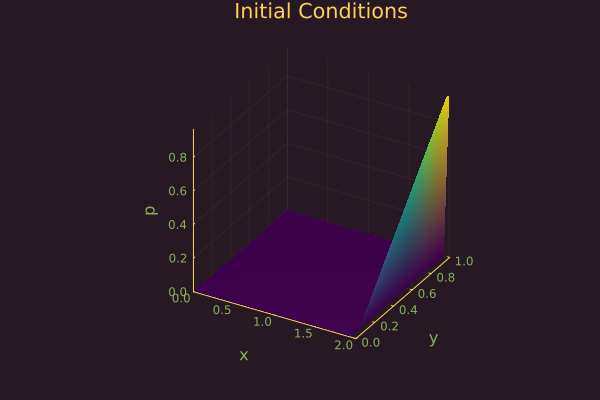

In [37]:
# plot the initial conditions
surface(x, y, p, title="Initial Conditions", xlabel="x", ylabel="y", zlabel="p", legend = false)


In [38]:
# now we call the laplace2D function
p = laplace2D(p, y, dx, dy, 1e-4);

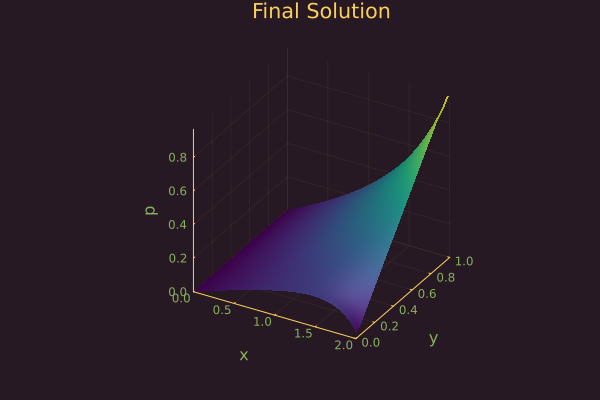

In [40]:
# plot the final conditions
surface(x, y, p, title="Final Solution", xlabel="x", ylabel="y", zlabel="p", legend = false)